In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import re
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime ,timedelta

In [ ]:
customer = pd.read_csv('/content/drive/My Drive/Quantium/QVI_purchase_behaviour.csv')
transaction = pd.read_excel('/content/drive/My Drive/Quantium/QVI_transaction_data.xlsx')

# customer data preprocessing

This data contains information about the customer's
- Married life - single, couple, family
- Customer segment - Premium, Mainstream, Budget
- Age - young or old

In [ ]:
customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,family_type
0,1000,YOUNG SINGLES/COUPLES,Premium,Single/Couple
1,1002,YOUNG SINGLES/COUPLES,Mainstream,Single/Couple
2,1003,YOUNG FAMILIES,Budget,Families
3,1004,OLDER SINGLES/COUPLES,Mainstream,Single/Couple
4,1005,MIDAGE SINGLES/COUPLES,Mainstream,Single/Couple


In [ ]:
customer.shape

(72637, 3)

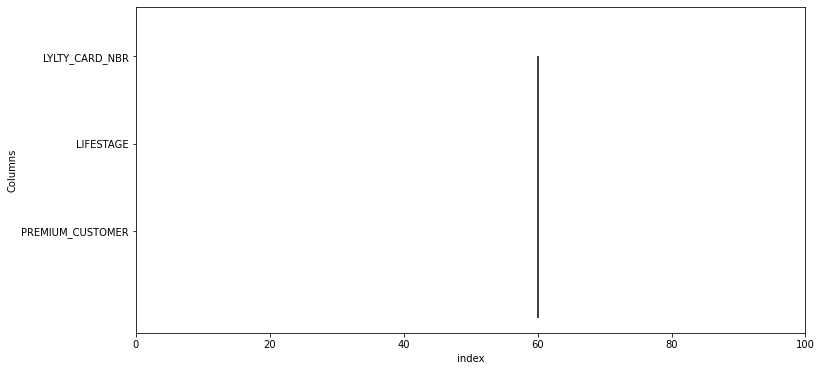

In [ ]:
# the percentage of missing observations in every columns

def missing(data):
  percentage,name = [],[]
  for i in range(len(data.columns)):
    percent = round(len(data[data[data.columns[i]].isnull()])/len(data)*100,2)
    percentage.append(percent)
    name.append(data.columns[i])  
  import seaborn as sns
  plt.figure(figsize=(12,6))
  sns.barplot(y=0,x='index',data=pd.DataFrame(name,percentage).reset_index(),color='black')
  plt.xlim(0,100)
  plt.vlines(60,0,len(data.columns))
  plt.ylabel('Columns')
  plt.show()

missing(customer)

There is no data missing in the customer data.

In [ ]:
# extracting the family type from the LIFESTAGE column.

def seperate(col):
  if 'SINGLES/COUPLES' in col:
    return 'Single/Couple'
  elif 'FAMILIES' in col:
    return 'Families'
  else:
    return 'retirees'
  
customer['family_type']=customer['LIFESTAGE'].apply(lambda x: seperate(x))

In [ ]:
# extracting the age group from the LIFESTAGE column. Assuming that new family = young (not 100% true)

def seperate(col):
  if ('OLDER' in col) or ('RETIREES' in col):
    return 'old'
  elif 'MIDAGE' in col:
    return 'mid'
  else:
    return 'young'
  
customer['age_group']=customer['LIFESTAGE'].apply(lambda x: seperate(x))

In [ ]:
customer.rename(columns={'PREMIUM_CUSTOMER': 'customer_segment'}, inplace=True)

In [ ]:
customer.drop(['LIFESTAGE'], axis=1, inplace=True)

In [ ]:
customer.to_csv('/content/drive/My Drive/Quantium/QVI_purchase_behaviour.csv')

# transaction preprocessing

In [ ]:
transaction.head() 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,ya
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,True
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,True
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,True
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,True
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,True


In [ ]:
transaction.shape

(264836, 9)

In [ ]:
# noting all the chips brand
Chips = ["smiths",'red rock deli','kettle','doritos','pringles','thins','twisties','grain waves','cheezels','natural chip','CC','cc','tyrrells',
         'infuzions','rrd','french fries','cobs','smith','infz','ww','dorito','sun','snb','tostitos','cheetos']

In [ ]:
# To filter out the non chips products.

def c(col):
  for i in Chips:
    if i in col.lower():
      return True

transaction['Chips'] = transaction['PROD_NAME'].apply(lambda x: c(x))

In [ ]:
# to find the non chips item

transaction[transaction['Chips'] != True]['PROD_NAME'].unique()

array(['Old El Paso Salsa   Dip Tomato Mild 300g', 'Burger Rings 220g',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Old El Paso Salsa   Dip Chnky Tom Ht300g',
       'Woolworths Mild     Salsa 300g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Woolworths Medium   Salsa 300g', 'Woolworths Cheese   Rings 190g'],
      dtype=object)

In [ ]:
# this data observation is an outlier

transaction[transaction['TOT_SALES'] == 650.]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,ya
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,True
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,True


In [ ]:
# subsetting all the chips products

chips = transaction[transaction['Chips'] == True]

In [ ]:
# droping the chips column as of no use now

chips.drop(['Chips'], axis = 1, inplace=True)

In [ ]:
chips.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,ya,quantity
0,43390.0,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,True,175
1,43599.0,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3,True,175
2,43605.0,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,True,170
3,43329.0,2.0,2373.0,974.0,69.0,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0,True,175
4,43330.0,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8,True,150


In [ ]:
# extracting the quantity of chips packet from product name

# re.sub(r'[a-z,A-Z &]','','Thins Potato Chips  Hot & Spicy 175g') for extracting weight can also use this code.

def change(col):
  try:
    return re.findall('[0-9]{2,3}',col)[0]
  except:
    return 0

chips['quantity'] = chips['PROD_NAME'].apply(lambda x: change(x))

In [ ]:
chips.dropna(inplace=True)

In [ ]:
def change(col):
  for i in Chips:
    if i in col.lower():
      return i
    
chips['brand'] = chips['PROD_NAME'].apply(lambda x: change(x))

In [ ]:
Chips = ["smiths",'red rock deli','kettle','doritos','pringles','thins','twisties','grain waves','cheezels','natural chip','CC','cc','tyrrells',
         'infuzions','rrd','french fries','cobs','smith','infz','ww','dorito','sun','snb','tostitos','cheetos']

In [ ]:
# could not come up with a better, more efficient way.

def change(col):
  if 'smi' in col:
    return 'Smiths'
  elif col == 'rrd':
    return 'Red Rock Deli'
  elif col == 'red rock':
    return 'Red Rock Deli'
  elif 'cc' in col.lower():
    return 'CC'
  elif 'dor' in col:
    return 'Doritos'
  elif col == 'inf':
    return 'Infuzions'
  elif col == 'kettle':
    return 'Kettle' 
  elif col == 'pringles':
    return 'Pringles'
  elif col == 'thins':
    return 'Thins'
  elif col == 'twisties':
    return 'Twisties'
  elif col == 'cheezels':
    return 'Cheezels' 
  elif col == 'grain waves':
    return 'Grain Waves'
  elif col == 'natural chip':
    return 'Natural Chip' 
  elif col == 'french fries':
    return 'French Fries'
  elif col == 'cobs':
    return 'Cobs'
  elif col == 'ww':
    return 'WW'
  elif col == 'sun':
    return 'Sunbite' 
  elif col == 'snb':
    return 'Sunbite'
  elif col == 'tostitos':
    return 'Tostitos' 
  elif col == 'cheetos':
    return 'Cheetos' 
  else:
    return col

chips['brand'] = chips['brand'].apply(lambda x: change(x))

In [ ]:
chips.shape

(248043, 11)

In [ ]:
# changing the date column in datetime format

from datetime import timedelta

def change_dates(col):
  base_date = pd.Timestamp('1900-01-01')  # check this!
  return base_date + timedelta(days=col)

chips['DATE'] = chips['DATE'].apply(lambda x: change_dates(x))

In [ ]:
# calculating the month and year from the date column

chips['month']=chips['DATE'].apply(lambda x: x.month)
chips['year']=chips['DATE'].apply(lambda x: x.year)

# merging the two data

In [ ]:
merged = chips.set_index('LYLTY_CARD_NBR').join(customer.set_index('LYLTY_CARD_NBR'))

In [ ]:
merged.head(2)

,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,ya,quantity,brand,customer_segment,age_group,family_type
LYLTY_CARD_NBR,,,,,,,,,,,,,
1000.0,43390.0,1.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,True,175,Natural Chip,Premium,young,Single/Couple
1002.0,43359.0,1.0,2.0,58.0,Red Rock Deli Chikn&Garlic Aioli 150g,1.0,2.7,True,150,red rock deli,Mainstream,young,Single/Couple


In [ ]:
merged.to_csv('/content/drive/My Drive/Quantium/final.csv')